# 드라이브 마운트

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/DX/딥러닝

/content/drive/MyDrive/Colab Notebooks/DX/딥러닝


# Fashion MNIST 연습 : DNN

## 1. 라이브러리 및 데이터 불러오기

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
labels = ['T-shirt',
          'Trouser',
          'Pullover',
          'Dress',
          'Coat',
          'Sandal',
          'Shirt',
          'Sneaker',
          'Bag',
          'Ankle boot'
          ]

print(labels)

['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

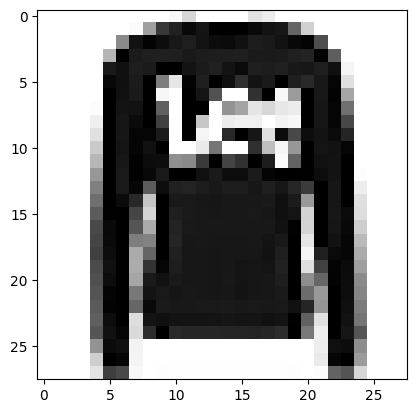

In [ ]:
plt.imshow(test_x[1], cmap='Greys')
plt.show()

## 2. 데이터 전처리

`-` Min-Max scaling (`MinMax scaler 금지` : 태블러 데이터에 최적화되어있기 때문)

* 전처리 규칙은 트레인셋을 따라야한다. (test set을 반영할 경우 이미 정답을 알고 있기 때문에 반칙임)

In [ ]:
max_n, min_n = train_x.max(), train_x.min()
max_n, min_n

(255, 0)

In [ ]:
train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

`-` Date reshape (흑백 채널 추가)

In [ ]:
train_x_re1 = train_x.reshape(train_x.shape[0], 28, 28, -1)
test_x_re1 = test_x.reshape(test_x.shape[0], 28, 28, -1)

`-`  Y : one-hot Encoding

In [ ]:
from keras.utils import to_categorical
train_y_c = to_categorical(train_y, 10)
test_y_c = to_categorical(test_y, 10)

## 3. 모델링

### (1) Sequential API

`-` 레이어를 순차적으로 쌓음

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout

In [ ]:
# 1. 세션 클리어
clear_session()

# 2. 모델 설계
model1 = Sequential()

model1.add( Input(shape = (28, 28, 1)) )
model1.add( Flatten() )
model1.add( Dense(1024, activation = "relu") )
model1.add( Dense(1024, activation = "relu") )
model1.add( BatchNormalization() )
model1.add( Dropout(0.25) )

model1.add( Dense(512, activation = "relu") )
model1.add( Dense(512, activation = "relu") )
model1.add( BatchNormalization() )
model1.add( Dropout(0.25) )

model1.add( Dense(256, activation = "relu") )
model1.add( Dense(128, activation = "relu") )
model1.add( BatchNormalization() )
model1.add( Dropout(0.25) )

model1.add( Dense(10, activation = "softmax")  )

# 3. 모델 컴파일
model1.compile(optimizer = "adam", loss = tf.keras.losses.categorical_crossentropy,
                              metrics = ["accuracy"])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                        

### (2) Functial API

`-` 레이어를 사슬처럼 엮기!

In [ ]:
## Functional

# 1. 세션 클리어
clear_session()

# 2. 레이어를 사슬처럼 엮기
il = Input(shape = (28, 28, 1))
hl = Flatten()(il)

hl = Dense(1024, activation = "relu")(hl)
hl = Dense(1024, activation = "relu")(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)

hl = Dense(512, activation = "relu")(hl)
hl = Dense(512, activation = "relu")(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)

hl = Dense(256, activation = "relu")(hl)
hl = Dense(128, activation = "relu")(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)

ol = Dense(10, activation  = "softmax")(hl)

# 3. 모델의 시작과 끝 지정/알려줌
model2 = Model(il, ol)

# 4. 컴파일
model2.compile(optimizer = "adam",
                             loss = tf.keras.losses.categorical_crossentropy,
                             metrics = ["accuracy"])

In [ ]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                             

### (3) Early Stoppin!

`-` 과적합 방지

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

`-` `validation_set`이 존재하지 않으면 학습은 되지만 `조기 종료`가 적용되지는 않음

In [ ]:
es = EarlyStopping(monitor = "val_loss",  ## 과적합 방지 기준
                                   min_delta = 0, ## 설정한 값으로 변화해야 모델 성능이 개선되었다고 판단하는 기준 ( Threshole)
                                    patience = 3, ## 성능이 개선되지 않을 떄 얼마나 참을건지
                                    verbose =1,
                                    restore_best_weights = True  ## 조기 종료 적용 후 최적 가중치를 모델의 전달
                                )

### (4) 학습

In [ ]:
model1.fit(train_x_re1, train_y_c, epochs = 10000, verbose = 1,
                    validation_split = 0.2,
                    callbacks = [es]
                    )

Epoch 1/10000
1500/1500 [==============================] - 16s 8ms/step - loss: 0.6193 - accuracy: 0.7822 - val_loss: 0.4821 - val_accuracy: 0.8240
Epoch 2/10000
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4524 - accuracy: 0.8396 - val_loss: 0.5486 - val_accuracy: 0.8242
Epoch 3/10000
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4079 - accuracy: 0.8548 - val_loss: 0.4085 - val_accuracy: 0.8562
Epoch 4/10000
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3751 - accuracy: 0.8657 - val_loss: 0.4142 - val_accuracy: 0.8517
Epoch 5/10000
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3548 - accuracy: 0.8730 - val_loss: 0.3567 - val_accuracy: 0.8732
Epoch 6/10000
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3312 - accuracy: 0.8806 - val_loss: 0.3416 - val_accuracy: 0.8790
Epoch 7/10000
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3140 - accuracy: 0.8861 - val_

### (5) 예측

In [ ]:
y_pred = model1.predict(test_x_re1).argmax(axis  = 1)

313/313 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import *

In [ ]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.78      0.81      0.79      1000
           3       0.89      0.89      0.89      1000
           4       0.76      0.82      0.79      1000
           5       0.99      0.95      0.97      1000
           6       0.75      0.63      0.68      1000
           7       0.93      0.97      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# CNN 잡담

`-` 이미지 데이터 분류 시 RGB로만 따지는게 당연한가?

* 사실 이미지 데이터를 flatten해서 모델링 하는 것은 그렇게 성능이 잘 나오지 않는다...

* 그래서 도입된게 `Convolutional Neural Networks`(CNN)가 등장함

`-` Feature Map == Activation Map : 컨볼루션 필터를 거쳐 만들어진 서로 다른 feature들의 모임

* 가로, 세로 채널 정보가 기록됨

* kernel과 padding(보통 0)을 이용하여 기록할 정보의 양을 조절

* 외곽정보 번영

## 실습

### (0) import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

In [ ]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
labels = {0 : 'Airplane',
          1 : 'Automobile',
          2 : 'Bird',
          3 : 'Cat',
          4 : 'Deer',
          5 : 'Dog',
          6 : 'Frog',
          7 : 'Horse',
          8 : 'Ship',
          9 : 'Truck' }

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


### (1) 데이터 스케일링

$$ X_{scaled} = {{x_{original} - mean(x)}\over{std(x)} } $$

`1` 한꺼번에 스케일링

In [ ]:
mean_n,  std_n = train_x.mean(), train_x.std()

In [ ]:
train_x = (train_x - mean_n)/std_n
test_x = (test_x-mean_n)/std_n

In [ ]:
train_x.mean(),  train_x.std()

(-2.5247951877342226e-17, 1.0000000000000022)

`2` 채널별로 스케일링

In [ ]:
tr_r_mean, tr_r_std = train_x[:,:,:,0].mean(), train_x[:,:,:,0].std() ##  첫번째 채널에 대한 평균과 표준편차
tr_g_mean, tr_g_std = train_x[:,:,:,1].mean(), train_x[:,:,:,1].std()
tr_b_mean, tr_b_std = train_x[:,:,:,2].mean(), train_x[:,:,:,2].std()

In [ ]:
train_x_r = (train_x[:,:,:,0]- tr_r_mean)/tr_r_std
train_x_g = (train_x[:,:,:,1]- tr_g_mean)/tr_g_std
train_x_b = (train_x[:,:,:,2]- tr_b_mean)/tr_b_std

In [ ]:
train_x = np.stack([train_x_r, train_x_g, train_x_b], axis = 3)

In [ ]:
train_x.shape

(50000, 32, 32, 3)

In [ ]:
test_x_r = (test_x[:,:,:,0]- tr_r_mean)/tr_r_std
test_x_g = (test_x[:,:,:,1]- tr_g_mean)/tr_g_std
test_x_b = (test_x[:,:,:,2]- tr_b_mean)/tr_b_std

In [ ]:
test_x = np.stack([test_x_r, test_x_g, test_x_b], axis = 3)

In [ ]:
test_x.shape

(10000, 32, 32, 3)

### (2) 원핫인코딩

In [ ]:
train_y[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
train_y = np.ravel(train_y)
test_y = np.ravel(test_y)

In [ ]:
class_n = len(np.unique(train_y))

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [ ]:
train_y.shape, test_y.shape

((50000, 10), (10000, 10))

### (4) Modeling 1. Sequential

- EarlyStopping 의 옵션도 조절해보자.
- .fit( )
- .predict( )
---

- **자유롭게 먼저 해보는 것을 추천**

---

- **구조를 따라서 코딩을 한다면**
    0. Functional, Sequential 중 택일
    1. 인풋레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    4. BatchNormalization
    5. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    6. DropOut : 25% 비활성화
    7. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    11. DropOut : 25% 비활성화
    12. Flatten( )
    13. Fully Connected Layer : 노드 1024개
    14. BatchNormalization
    15. DropOut : 35% 비활성화
    16. 아웃풋레이어



In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# 1. 세션클리어

keras.backend.clear_session()

# 2. 모델 발판 생성 : 레이이 블록을 조립할 발판 생성
model1 = keras.models.Sequential()
# 3. 레이어 블록 조합 : .add()
model1.add( keras.layers.Input(shape = (32, 32, 3)) )

# Convolution : 필터수 32개, 사이즈(3, 3), same padding

model1.add( keras.layers.Conv2D(filters = 32, ## 새롭게 제작하려는 feature 맵의 수
                                                            kernel_size = (3,3),  ## 커널 사이즈
                                                              strides = (1,1),     ## Conv2D 필터위 이동보폭
                                                              padding = "same", ## 1. 이전 feature map 사이즈 유지 | 2. 외곽 정보를 더 반영
                                                                activation = "relu"  ) )

# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model1.add( keras.layers.Conv2D(filters = 32, ## 새롭게 제작하려는 feature 맵의 수
                                                            kernel_size = (3,3),  ## 커널 사이즈
                                                              strides = (1,1),     ## Conv2D 필터위 이동보폭
                                                              padding = "same", ## 1. 이전 feature map 사이즈 유지 | 2. 외곽 정보를 더 반영
                                                                activation = "relu"  ) )

#BatchNormalization
model1.add( keras.layers.BatchNormalization() )
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model1.add( keras.layers.MaxPool2D(pool_size = (2, 2), ## Maxpool2D 필터의 가로세로 사이즈
                                                                    strides = (2,2),  ##  Maxpool2D 필터의 이동 보폭! # default는 필터 사즈를 따름
                                                              ))

# DropOut : 25% 비활성화
model1.add ( keras.layers.Dropout(0.25) )

# Convolution : 필터수 32개, 사이즈(3, 3), same padding

model1.add( keras.layers.Conv2D(filters = 64, ## 새롭게 제작하려는 feature 맵의 수
                                                            kernel_size = (3,3),  ## 커널 사이즈
                                                              strides = (1,1),     ## Conv2D 필터위 이동보폭
                                                              padding = "same", ## 1. 이전 feature map 사이즈 유지 | 2. 외곽 정보를 더 반영
                                                                activation = "relu"  ) )

# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model1.add( keras.layers.Conv2D(filters = 64, ## 새롭게 제작하려는 feature 맵의 수
                                                            kernel_size = (3,3),  ## 커널 사이즈
                                                              strides = (1,1),     ## Conv2D 필터위 이동보폭
                                                              padding = "same", ## 1. 이전 feature map 사이즈 유지 | 2. 외곽 정보를 더 반영
                                                                activation = "relu"  ) )

#BatchNormalization
model1.add( keras.layers.BatchNormalization() )
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model1.add( keras.layers.MaxPool2D(pool_size = (2, 2), ## Maxpool2D 필터의 가로세로 사이즈
                                                                    strides = (2,2),  ##  Maxpool2D 필터의 이동 보폭! # default는 필터 사즈를 따름
                                                              ))

# DropOut : 25% 비활성화
model1.add ( keras.layers.Dropout(0.25) )

# Flatten( )
model1.add( keras.layers.Flatten() )

# Fully Connected Layer : 노드 1024개
model1.add( keras.layers.Dense(1024, activation = "relu"))

# BatchNormalization

model1.add(keras.layers.BatchNormalization())

# DropOut : 35% 비활성화

model1.add( keras.layers.Dropout(0.35) )

# 아웃풋레이어
model1.add( keras.layers.Dense(10, activation = "softmax"))

# 4. 컴파일

model1.compile(optimizer = "adam",
                              loss = keras.losses.categorical_crossentropy,
                              metrics = ["accuracy"])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        1

### (5) Modeling 2. Functional

In [ ]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.losses import categorical_crossentropy

In [ ]:
## Functional API
# 1. 세션 클리어 : 청소
clear_session()

# 2. 레이어 사슬처럼 엮기
# 인풋레이어
il = Input(shape=(32,32,3))
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(filters=32,         # 새롭게 제작하려는 feature map의 수! 혹은 서로 다른 필터 32개 사용!
            kernel_size=(3,3),  # Conv2D 필터의 가로세로 사이즈!
            strides=(1,1),      # Conv2D 필터의 이동 보폭!
            padding='same',     # 1.이전 feature map 사이즈 보존! 2. 외곽 정보 더 반영!
            activation='relu'
            )(il)               # 주의!!!
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(filters=32,         # 새롭게 제작하려는 feature map의 수! 혹은 서로 다른 필터 32개 사용!
            kernel_size=(3,3),  # Conv2D 필터의 가로세로 사이즈!
            strides=(1,1),      # Conv2D 필터의 이동 보폭!
            padding='same',     # 1.이전 feature map 사이즈 보존! 2. 외곽 정보 더 반영!
            activation='relu'
            )(hl)               # 주의!!!
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D(pool_size=(2,2), # Maxpool2D 필터의 가로세로 사이즈!
               strides=(2,2)    # Maxpool2D 필터의 이동 보폭! 기본적으로 필터 사이즈를 따름!
               )(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)

# Convolution : 필터수 64개, 사이즈(3, 3), same padding
hl = Conv2D(filters=64,         # 새롭게 제작하려는 feature map의 수! 혹은 서로 다른 필터 32개 사용!
            kernel_size=(3,3),  # Conv2D 필터의 가로세로 사이즈!
            strides=(1,1),      # Conv2D 필터의 이동 보폭!
            padding='same',     # 1.이전 feature map 사이즈 보존! 2. 외곽 정보 더 반영!
            activation='relu'
            )(hl)               # 주의!!!
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
hl = Conv2D(filters=64,         # 새롭게 제작하려는 feature map의 수! 혹은 서로 다른 필터 32개 사용!
            kernel_size=(3,3),  # Conv2D 필터의 가로세로 사이즈!
            strides=(1,1),      # Conv2D 필터의 이동 보폭!
            padding='same',     # 1.이전 feature map 사이즈 보존! 2. 외곽 정보 더 반영!
            activation='relu'
            )(hl)               # 주의!!!
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D(pool_size=(2,2), # Maxpool2D 필터의 가로세로 사이즈!
               strides=(2,2)    # Maxpool2D 필터의 이동 보폭! 기본적으로 필터 사이즈를 따름!
               )(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)

# Flatten( )
hl = Flatten()(hl)
# Fully Connected Layer : 노드 1024개
hl = Dense(1024, activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# DropOut : 35% 비활성화
hl = Dropout(0.35)(hl)
# 아웃풋레이어
ol = Dense(10, activation='softmax')(hl)

# 3. 모델의 시작과 끝 지정
model2 = Model(il, ol)

# 4. 컴파일
model2.compile(optimizer='adam',
               loss=categorical_crossentropy,
               metrics=['accuracy']
               )

In [ ]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0     

### (6) 조기 종료 & fit

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_loss',     # 얼리스토핑을 적용할 대상!
                   min_delta=0,            # Threshold. 이보다 크게 변화해야 성능 개선 간주!
                   patience=3,             # 성능 개선이 발생하지 않을 때, 몇 epochs 더 볼 것인지!
                   verbose=1,              # 어느 epoch가 최적인지 알려줌!
                   restore_best_weights=True # 얼리스토핑으로 학습이 멈췄을 때, 최적의 가중치를 가진 시점으로 돌려줌!
                   )

In [ ]:
model2.fit(train_x, train_y, epochs=10000, verbose=1,
           validation_split=0.2,   # 매 epoch마다 training set에서 20%를 validation으로 지정!
           callbacks=[es]          # 얼리스토핑 적용!
           )

Epoch 1/10000
1250/1250 [==============================] - 22s 6ms/step - loss: 1.5738 - accuracy: 0.4804 - val_loss: 1.1359 - val_accuracy: 0.6085
Epoch 2/10000
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0663 - accuracy: 0.6273 - val_loss: 1.0045 - val_accuracy: 0.6558
Epoch 3/10000
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9055 - accuracy: 0.6866 - val_loss: 0.8294 - val_accuracy: 0.7143
Epoch 4/10000
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8033 - accuracy: 0.7213 - val_loss: 0.7584 - val_accuracy: 0.7390
Epoch 5/10000
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7185 - accuracy: 0.7477 - val_loss: 0.7612 - val_accuracy: 0.7412
Epoch 6/10000
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6460 - accuracy: 0.7753 - val_loss: 0.7051 - val_accuracy: 0.7644
Epoch 7/10000
1250/1250 [==============================] - 7s 5ms/step - loss: 0.5871 - accuracy: 0.7934 - val_loss: 

### (7) 예측

In [ ]:
# 원핫 인코딩 해제 : 카테고리 중 가장 높은 값
train_y = train_y.argmax(axis=1)
test_y = test_y.argmax(axis=1)


pred_train = model2.predict(train_x)
pred_test = model2.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%')
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%')

313/313 [==============================] - 1s 2ms/step
CNN
트레이닝 정확도 : 92.77%
테스트 정확도 : 79.73%


***

# Yolo

## import

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 641.0/641.0 kB 8.7 MB/s eta 0:00:0000:0100:01


In [2]:
from ultralytics import YOLO
from ultralytics import settings

## 모델링. 연습

`-`  `yolov8n.t`라는 파이토치 파일을 받게됨

In [4]:
model = YOLO()  ## step1. 모델 로드
model.train() ##  step2. 모델학습

Ultralytics YOLOv8.0.197 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco8.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimiz

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0, 16, 17, 20, 25, 58])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78a0206fdc00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

In [5]:
model.val()  ## step3. 모델 평가

Ultralytics YOLOv8.0.197 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.59it/s]
                   all          4         17      0.939      0.533       0.84      0.554
                person          4         10          1      0.198      0.481      0.233
                   dog          4          1          1          0      0.995      0.443
                 horse          4          2      0.946          1      0.995      0.699
              elephant          4          2          1          0       0.58      0.058
              umbrella          4          1      0.763          1      0.995      0.995
          potted p

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [6]:
model.predict(save = True)  ## step4. 예측

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 11.3ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 3 persons, 1 tie, 12.4ms
Speed: 2.6ms preprocess, 11.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

# 일단 코드 돌리기

In [ ]:
# !pip install ultralytics

In [8]:
from ultralytics import settings
settings

{'settings_version': '0.0.4',
 'datasets_dir': '/content/datasets',
 'weights_dir': 'weights',
 'runs_dir': 'runs',
 'uuid': '569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb',
 'sync': True,
 'api_key': '',
 'clearml': True,
 'comet': True,
 'dvc': True,
 'hub': True,
 'mlflow': True,
 'neptune': True,
 'raytune': True,
 'tensorboard': True,
 'wandb': True}

In [10]:
from ultralytics import YOLO
YOLO

ultralytics.models.yolo.model.YOLO

## (1) 모델링

### 모델 선언

- `n, s, m, l, x` 순으로 모델의 크기가 크다

- 모델의 구조와 해당 구조에 맞게 사전 학습된 가중치를 불러온다.

- Parameters
    1. model : 모델 구조 또는 모델 구조 + 가중치 설정. task와 맞는 모델을 선택해야 한다.
    2. task : detect, segment, classify, pose 중 택일

In [11]:
model = YOLO(model='yolov8n.pt', task='detect')

`-`  모델 학습

- Parameters
    1. data : 학습시킬 데이터셋의 경로. default 'coco128.yaml'
    2. epochs : 학습 데이터 전체를 총 몇 번씩 학습시킬 것인지 설정. default 100
    3. patience : 학습 과정에서 성능 개선이 발생하지 않을 때 몇 epoch 더 지켜볼 것인지 설정. default 50
    4. batch : 미니 배치의 사이즈 설정. default 16. -1일 경우 자동 설정.
    5. imgsz : 입력 이미지의 크기. default 640
    6. save : 학습 과정을 저장할 것인지 설정. default True
    7. project : 학습 과정이 저장되는 폴더의 이름.
    8. name : project 내부에 생성되는 폴더의 이름.
    9. exist_ok : 동일한 이름의 폴더가 있을 때 덮어씌울 것인지 설정. default False
    10. pretrained : 사전 학습된 모델을 사용할 것인지 설정. default False
    11. optimizer : 경사 하강법의 세부 방법 설정. default 'auto'
    12. verbose : 학습 과정을 상세하게 출력할 것인지 설정. default False
    13. seed : 재현성을 위한 난수 설정
    14. resume : 마지막 학습부터 다시 학습할 것인지 설정. default False
    15. freeze : 첫 레이어부터 몇 레이어까지 기존 가중치를 유지할 것인지 설정. default None

## (2) 모델 학습

In [13]:
model.train(data='coco128.yaml',  ## 학습시킬 데이터셋의 경로. default 'coco128.yaml'
            epochs=10, ##  학습 데이터 전체를 총 몇 번씩 학습시킬 것인지 설정. default 100
            patience=5, ## 학습 과정에서 성능 개선이 발생하지 않을 때 몇 epoch 더 지켜볼 것인지 설정. default 50
            save=True, ## 학습 과정을 저장할 것인지 설정. default True
            project='trained', ## 학습 과정이 저장되는 폴더의 이름.
            name='trained_model', ## project 내부에 생성되는 폴더의 이름.
            exist_ok=False, ## 동일한 이름의 폴더가 있을 때 덮어씌울 것인지 설정. default False
            pretrained= True, ##  사전 학습된 모델을 사용할 것인지 설정. default False
            optimizer='auto', ## 경사 하강법의 세부 방법 설정. default 'auto'
            verbose=True, ##  학습 과정을 상세하게 출력할 것인지 설정. default False
            seed=2023,
            resume=False, ## 마지막 학습부터 다시 학습할 것인지 설정. default False
            freeze=None ## 첫 레이어부터 몇 레이어까지 기존 가중치를 유지할 것인지 설정. default None
            )

Ultralytics YOLOv8.0.197 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=10, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=trained, name=trained_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=2023, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78a1df66ecb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,

### 예측값 생성
- Parameters
    1. source : 예측 대상 이미지/동영상의 경로
    2. conf : confidence score threshold. default 0.25
    3. iou : NMS에 적용되는 IoU threshold. default 0.7. threshold를 넘기면 같은 object를 가리키는 거라고 판단.
    4. save : 예측된 이미지/동영상을 저장할 것인지 설정. default False
    5. save_txt : Annotation 정보도 함께 저장할 것인지 설정. default False
    6. save_conf : Annotation 정보 맨 끝에 Confidence Score도 추가할 것인지 설정. default False
    7. line_width : 그려지는 박스의 두께 설정. default None

In [14]:
model.predict(source='https://images.pexels.com/photos/139303/pexels-photo-139303.jpeg',
              save=True, save_txt=True)


100%|██████████| 6.94M/6.94M [00:00<00:00, 85.1MB/s]
image 1/1 /content/pexels-photo-139303.jpeg: 448x640 21 persons, 7 cars, 1 traffic light, 125.6ms
Speed: 3.2ms preprocess, 125.6ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to trained/trained_model3
1 label saved to trained/trained_model3/labels


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

`-` 간판을 보고 신호등이라고 예측함...

* 오브젝트 디텍션의 문제점 1. 작은 개체들을 잘 인식하지 못함..

***

# Yolo : roboflow

## locale 설정

In [1]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

## 데이터 로드

`-` [데이터 링크](https://universe.roboflow.com/joaoissamu/objectdetect-fs9hx/dataset/1)

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CFN8PqXoTmjvuzqg4YVV")
project = rf.workspace("joaoissamu").project("objectdetect-fs9hx")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.197, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to ObjectDetect-1 in yolov8:: 100%|██████████| 952/952 [00:00<00:00, 6824.04it/s]


`ObjectDetect-1` 폴더가 생김

* 데이터 셋의 형식만 yolov8에 맞게 생성되서 온 것임

## 모델링 : 기존 모델로 예측

In [3]:
from ultralytics import YOLO

`1` 모델 로드

In [4]:
model = YOLO( model = "yolov8s.pt", task = "detect" ) ## 두번째로 작은 모델을 불러옴

100%|██████████| 21.5M/21.5M [00:00<00:00, 177MB/s]


`2` 모델학습

In [14]:
model.train(
                         data = "/content/ObjectDetect-1/data.yaml",  ## 이미지 경로 data.yaml 파일에서 확인
                         epochs = 1,
                          patience = 1,
                          save = True,
                         pretrained = True,    ## 사전학습된 가중치까지 가져옴
                         verbose = False,
                         seed = 2023
                    )

Ultralytics YOLOv8.0.197 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/ObjectDetect-1/data.yaml, epochs=1, patience=1, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=2023, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscri

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d421013aa10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

## 예측

`-` 경로 : runs -> detect> -> predict

In [19]:
results = model.predict(source='https://images.pexels.com/photos/139303/pexels-photo-139303.jpeg',
               save=True, save_txt=True, line_width=2)

Found https://images.pexels.com/photos/139303/pexels-photo-139303.jpeg locally at pexels-photo-139303.jpeg
Results saved to runs/detect/predict5
1 label saved to runs/detect/predict5/labels


`-`  별로 예측을 잘 하지는 않음

* `epochs = 1` 이라서 그런 것 같음,,

In [20]:
for r in results :
          boxes = r.boxes

In [21]:
boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0., 0., 0.], device='cuda:0')
conf: tensor([0.6365, 0.4913, 0.4734, 0.4352, 0.2725], device='cuda:0')
data: tensor([[2.2125e+03, 0.0000e+00, 3.2761e+03, 3.2103e+03, 6.3646e-01, 0.0000e+00],
        [2.8615e+03, 0.0000e+00, 3.8910e+03, 3.1475e+03, 4.9131e-01, 0.0000e+00],
        [3.6554e+03, 0.0000e+00, 5.3880e+03, 3.2764e+03, 4.7340e-01, 0.0000e+00],
        [2.2317e+03, 0.0000e+00, 2.8250e+03, 2.9325e+03, 4.3523e-01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.8446e+03, 3.4361e+03, 2.7247e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (3592, 5388)
shape: torch.Size([5, 6])
xywh: tensor([[2744.3359, 1605.1661, 1063.5923, 3210.3323],
        [3376.2246, 1573.7708, 1029.5210, 3147.5415],
        [4521.7246, 1638.2061, 1732.5503, 3276.4121],
        [2528.3904, 1466.2367,  593.2974, 2932.4734],
        [ 922.3008, 1718.0380, 1844.6017, 3436.0759]], device='cuda:0')
xywhn: tensor([